<a href="https://colab.research.google.com/github/DataEtnos/estudos_python/blob/main/RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install matplotlib==3.5.3
!pip install pandas-profiling==3.3.0
!pip install sidetable
!pip install --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 62.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.5.0 requires matplotlib>=3.7.1, but you have matplotlib 3.5.3 which is incompatible.
plotnine 0.12.4 requires matplotlib>=3.6.0, but you have matplotlib 3.5.3 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.0/268.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 46.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 25.9

ERROR: You must give at least one requirement to install (see "pip help install")


In [2]:
#Importação das bibliotecas -  Setup
import pandas as  pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform
import sidetable
import pandas_profiling
import datetime
import calendar
import plotly.express as px

/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/usr/local/lib/python3.10/dist-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [3]:
df= pd.read_excel("/content/data.xlsx")

In [4]:
#Vericando a cabeça do Data set
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [5]:
#coletando informações de dados nulos e verificando o tipo de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
#verificando a calda do data set
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-09-12 12:50:00,4.95,12680.0,France


In [7]:
#Verificando as metricas estatisticas do dataset e suas distribuição
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
# usei aqui para coletar os nomes e irei fazer a tradução deste nommes
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [9]:
# Traduzindo os nommes das colunas
df= df.rename(columns = {"Description":"Descrição","Quantity":"Quantidade","StockCode":"Cod_Estoque","UnitPrice":"Preco_unit","InvoiceDate":"Data_compra","Country":"Pais","InvoiceNo":"Cod_fatura"})

In [10]:
#verificando as mudanças de nomes
df.head()

,Cod_fatura,Cod_Estoque,Descrição,Quantidade,Data_compra,Preco_unit,CustomerID,Pais
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [11]:
#verificando e contabilizando os valores faltantes
df.isna().sum()

Cod_fatura          0
Cod_Estoque         0
Descrição        1454
Quantidade          0
Data_compra         0
Preco_unit          0
CustomerID     135080
Pais                0
dtype: int64

In [12]:
#retirando do Data set todos os valores faltantes , pois sem a descrição do item e  o customer id , não vejo muito sentiodo em continuar as analises.
df_sem_nulo =  df.dropna()

In [13]:
#verificando as 5 primeiras linhas
df_sem_nulo.head()

,Cod_fatura,Cod_Estoque,Descrição,Quantidade,Data_compra,Preco_unit,CustomerID,Pais
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [14]:
#verificando os tipo das colunas e veriifcando também se existe valores faltantes no dataframe
df_sem_nulo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Cod_fatura   406829 non-null  object 
 1   Cod_Estoque  406829 non-null  object 
 2   Descrição    406829 non-null  object 
 3   Quantidade   406829 non-null  int64  
 4   Data_compra  406829 non-null  object 
 5   Preco_unit   406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Pais         406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [15]:
#fazendo uma analises descritivas dos dados do dataframe.
df_sem_nulo.describe()

,Quantidade,Preco_unit,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [16]:
#selecionando dados  quantidade e preço unitario maior que zero
df_sem_nulo = df_sem_nulo.loc[df_sem_nulo['Quantidade'] > 0]
df_sem_nulo = df_sem_nulo.loc[df_sem_nulo['Preco_unit'] > 0]

In [17]:
#verificando se a seleção deu certo
df_sem_nulo.describe()

,Quantidade,Preco_unit,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [18]:
df.columns

Index(['Cod_fatura', 'Cod_Estoque', 'Descrição', 'Quantidade', 'Data_compra',
       'Preco_unit', 'CustomerID', 'Pais'],
      dtype='object')

In [19]:
df_limpo = df_sem_nulo.drop_duplicates(subset = ['Cod_fatura', 'Cod_Estoque', 'Descrição', 'Quantidade', 'Data_compra',
       'Preco_unit', 'CustomerID', 'Pais'] )

In [20]:
df_sem_nulo.duplicated().any()


True

In [21]:
df_limpo.duplicated().any()

False

limpar valores duplicados


In [144]:
#verificando os tipos de dados
df_limpo.dtypes

Cod_fatura      object
Cod_Estoque     object
Descrição       object
Quantidade       int64
Data_compra     object
Preco_unit     float64
CustomerID     float64
Pais            object
dtype: object

In [23]:
#transformando colunas
df_limpo['Data_compra'].astype('datetime64[ns]')
df_limpo['CustomerID'].astype('object')

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 392692, dtype: object

In [143]:
#Verificando os data
df_limpo

,Cod_fatura,Cod_Estoque,Descrição,Quantidade,Data_compra,Preco_unit,CustomerID,Pais
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France


#TRATANDO OS OUTLIERS !!!


<Axes: >

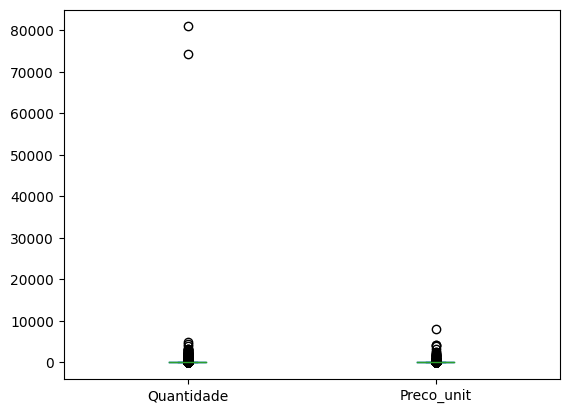

In [25]:
df_limpo[["Quantidade","Preco_unit"]].plot.box()

In [26]:
#Função de interquartil range
def is_outlier(array, extreme=False):

  q1,q3 = np.quantile(array, [.25,.75])
  iqr = q3-q1

  factor = 1.5 if extreme else 1.5
  upper_outlier = q3 + factor*iqr
  lower_outlier = q1 - factor*iqr

  return (array < lower_outlier) | (array > upper_outlier)

In [27]:
#contando os out liers na coluna quantidade
is_outlier(df_limpo.Quantidade).sum()

25616

In [28]:
#contando os out liers na coluna Preco_unit
is_outlier(df_limpo.Preco_unit).sum()

34112

In [29]:
#Aplicando a função de outiers
outliers_preco_unit = is_outlier(df_limpo['Preco_unit'])
outliers_quantidade = is_outlier(df_limpo['Quantidade'])

In [30]:
#linha a linha
outlier_rows = df_limpo[outliers_preco_unit | outliers_quantidade]

In [31]:
print(outlier_rows)

       Cod_fatura Cod_Estoque                         Descrição  Quantidade  \
5          536365       22752      SET 7 BABUSHKA NESTING BOXES           2   
9          536367       84879     ASSORTED COLOUR BIRD ORNAMENT          32   
16         536367       22622    BOX OF VINTAGE ALPHABET BLOCKS           2   
19         536367       21777       RECIPE BOX WITH METAL HEART           4   
20         536367       48187               DOORMAT NEW ENGLAND           4   
...           ...         ...                               ...         ...   
541865     581583       20725           LUNCH BAG RED RETROSPOT          40   
541866     581583       85038   6 CHOCOLATE LOVE HEART T-LIGHTS          36   
541867     581584       20832  RED FLOCK LOVE HEART PHOTO FRAME          72   
541868     581584       85038   6 CHOCOLATE LOVE HEART T-LIGHTS          48   
541892     581586       21217     RED RETROSPOT ROUND CAKE TINS          24   

                Data_compra  Preco_unit  CustomerID

In [32]:
# Removendo as linhas em que 'Quantidade' é superior a 10000 e 'Preco_unit' é superior a 5000
df_clean = df_limpo[(df_limpo['Quantidade'] <= 10000) & (df_limpo['Preco_unit'] <= 5000)]

#novo data set

print(df_clean)


       Cod_fatura Cod_Estoque                            Descrição  \
0          536365      85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1          536365       71053                  WHITE METAL LANTERN   
2          536365      84406B       CREAM CUPID HEARTS COAT HANGER   
3          536365      84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4          536365      84029E       RED WOOLLY HOTTIE WHITE HEART.   
...           ...         ...                                  ...   
541904     581587       22613          PACK OF 20 SPACEBOY NAPKINS   
541905     581587       22899         CHILDREN'S APRON DOLLY GIRL    
541906     581587       23254        CHILDRENS CUTLERY DOLLY GIRL    
541907     581587       23255      CHILDRENS CUTLERY CIRCUS PARADE   
541908     581587       22138        BAKING SET 9 PIECE RETROSPOT    

        Quantidade          Data_compra  Preco_unit  CustomerID  \
0                6  2010-01-12 08:26:00        2.55     17850.0   
1                6  2010-

<Axes: >

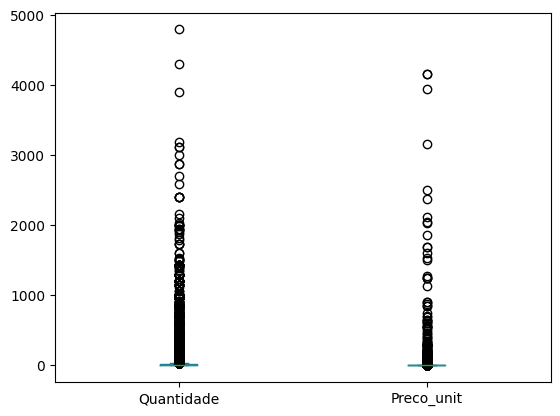

In [33]:
df_clean[["Quantidade","Preco_unit"]].plot.box()

In [106]:
#CRIANDO COLUNA DE TOTAL DE COMPRA
df_clean_copy = df_clean.copy()


df_clean_copy['Total da compra'] = df_clean_copy['Quantidade'] * df_clean_copy['Preco_unit']


df_clean = df_clean_copy


df_clean.head()

,Cod_fatura,Cod_Estoque,Descrição,Quantidade,Data_compra,Preco_unit,CustomerID,Pais,Total da compra,Data,Hora,mes
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-01-12,08:26:00,1
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,08:26:00,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-01-12,08:26:00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,08:26:00,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,08:26:00,1


In [107]:
#Para calculo de recencia
data_ultima_compra = df_clean['Data_compra'].max()

print("Data da última compra:", data_ultima_compra)

Data da última compra: 2011-12-10 17:19:00


In [108]:
Maior_valor_pais = df_clean.groupby("Pais")["Total da compra"].sum()
Maior_valor_pais = Maior_valor_pais.sort_values(ascending=False)

print(Maior_valor_pais)

Pais
United Kingdom          7031228.694
Netherlands              285446.340
EIRE                     265262.460
Germany                  228678.400
France                   208934.310
Australia                138453.810
Spain                     61558.560
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38367.830
Japan                     37416.370
Norway                    36165.440
Portugal                  33375.840
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20440.540
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13502.850
Austria                   10198.680
Poland                     7334.650
Israel                     7215.840
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                      2725.590
Unspecified            

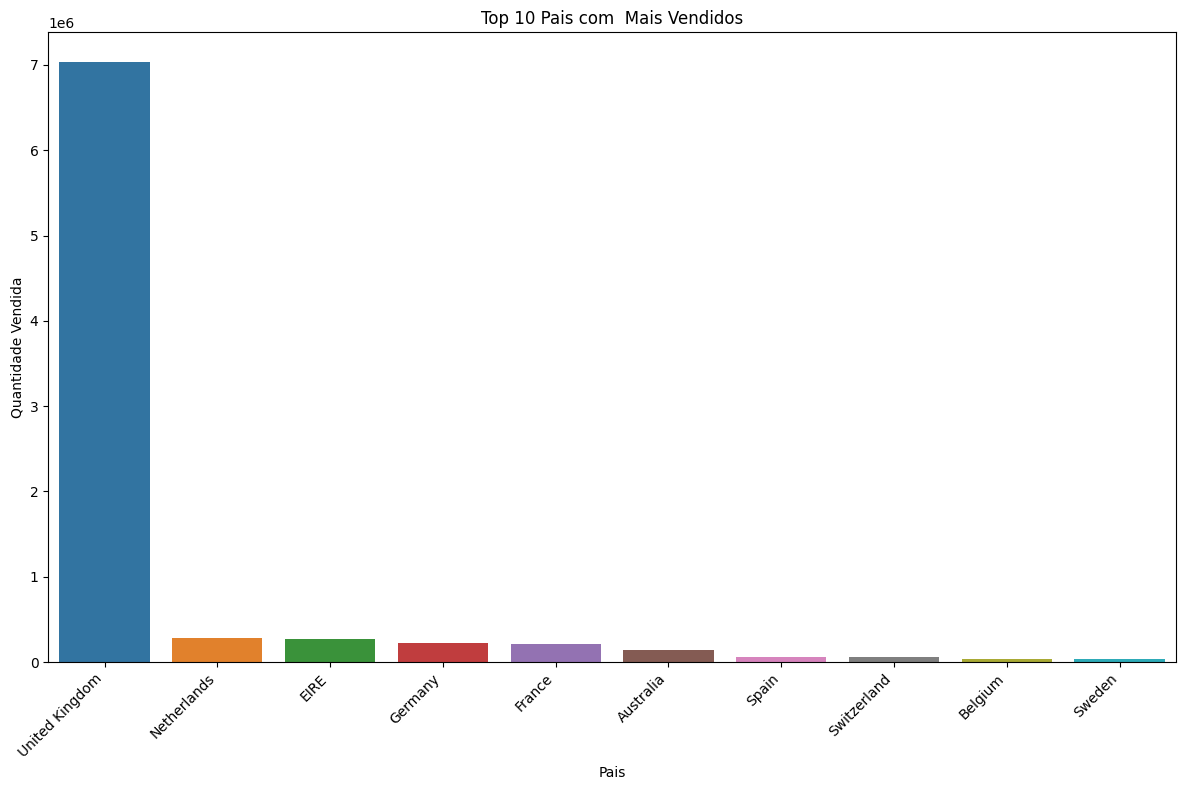

In [109]:
# Selecionar os top 10 produtos mais vendidos
Maior_valor_pais  = Maior_valor_pais .head(10)

# Criando o gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=Maior_valor_pais.index, y=Maior_valor_pais .values)
plt.xlabel('Pais')
plt.ylabel('Quantidade Vendida')
plt.title('Top 10 Pais com  Mais Vendidos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [110]:
# Agrupar os dados por produto e somar as quantidades vendidas
produtos_mais_vendidos = df_clean.groupby('Descrição')['Quantidade'].sum()

# Classificar os produtos com base nas quantidades vendidas
produtos_mais_vendidos = produtos_mais_vendidos.sort_values(ascending=False)

# Visualizar os top produtos mais vendidos
print(produtos_mais_vendidos)


Descrição
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
                                      ...  
PINK POLKADOT KIDS BAG                    1
WHITE ROSEBUD  PEARL EARRINGS             1
HEN HOUSE W CHICK IN NEST                 1
CAPIZ CHANDELIER                          1
EASTER CRAFT IVY WREATH WITH CHICK        1
Name: Quantidade, Length: 3876, dtype: int64


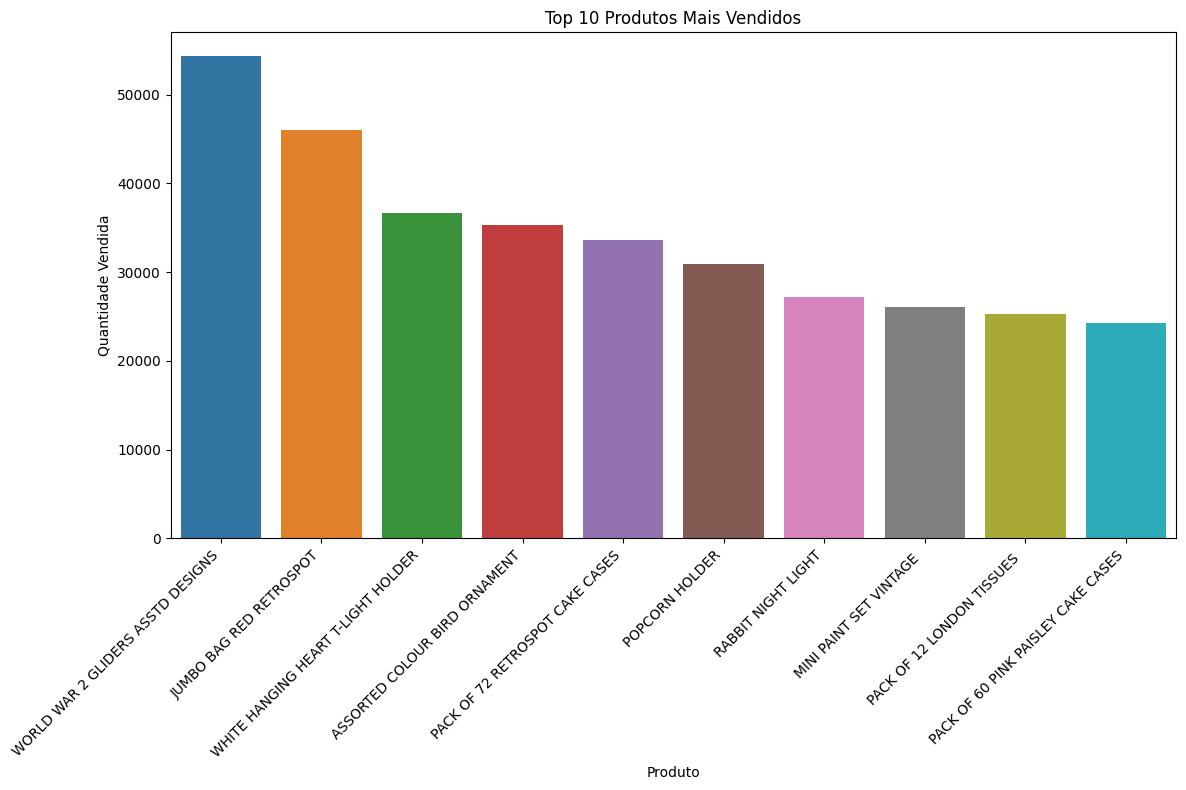

In [111]:
# Selecionar os top 10 produtos mais vendidos
top_10_produtos = produtos_mais_vendidos.head(10)

# Criando o gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_produtos.index, y=top_10_produtos.values)
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [112]:
df_clean['Data_compra'] = pd.to_datetime(df_clean['Data_compra'])

# Separar data e hora em colunas separadas
df_clean['Data'] = df_clean['Data_compra'].dt.date
df_clean['Hora'] = df_clean['Data_compra'].dt.time
df_clean['mes'] = df_clean['Data_compra'].dt.month
# Exibir o DataFrame resultante
print(df_clean.head())

  Cod_fatura Cod_Estoque                            Descrição  Quantidade  \
0     536365      85123A   WHITE HANGING HEART T-LIGHT HOLDER           6   
1     536365       71053                  WHITE METAL LANTERN           6   
2     536365      84406B       CREAM CUPID HEARTS COAT HANGER           8   
3     536365      84029G  KNITTED UNION FLAG HOT WATER BOTTLE           6   
4     536365      84029E       RED WOOLLY HOTTIE WHITE HEART.           6   

          Data_compra  Preco_unit  CustomerID            Pais  \
0 2010-01-12 08:26:00        2.55     17850.0  United Kingdom   
1 2010-01-12 08:26:00        3.39     17850.0  United Kingdom   
2 2010-01-12 08:26:00        2.75     17850.0  United Kingdom   
3 2010-01-12 08:26:00        3.39     17850.0  United Kingdom   
4 2010-01-12 08:26:00        3.39     17850.0  United Kingdom   

   Total da compra        Data      Hora  mes  
0            15.30  2010-01-12  08:26:00    1  
1            20.34  2010-01-12  08:26:00    1  
2 

In [113]:
df_clean.head()

,Cod_fatura,Cod_Estoque,Descrição,Quantidade,Data_compra,Preco_unit,CustomerID,Pais,Total da compra,Data,Hora,mes
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-01-12,08:26:00,1
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,08:26:00,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-01-12,08:26:00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,08:26:00,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,08:26:00,1


In [114]:
# Agrupar os dados por produto e somar as quantidades vendidas
vendas_mes = df_clean.groupby('mes')['Total da compra'].sum()

# Visualizar os top produtos mais vendidos
print(vendas_mes)


mes
1      569338.900
2      532805.230
3      660367.450
4      601577.861
5      748844.180
6      718087.870
7      787714.141
8      646103.790
9      963044.012
10     935414.330
11    1039157.810
12     430957.370
Name: Total da compra, dtype: float64


In [115]:
vendas_mes.info()



<class 'pandas.core.series.Series'>
Int64Index: 12 entries, 1 to 12
Series name: Total da compra
Non-Null Count  Dtype  
--------------  -----  
12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


In [116]:
vendas_mes = df_clean.groupby('mes')['Total da compra'].sum().reset_index()

# Transformar os números dos meses em nomes dos meses
vendas_mes['mes'] = vendas_mes['mes'].apply(lambda x: calendar.month_name[x])

# Criando o gráfico de barras dinâmico
fig = px.bar(vendas_mes, x='mes', y='Total da compra', title='Total de Compras por Mês',
             labels={'mes': 'Mês', 'Total da compra': 'Total da Compra'})

# Mostrar o gráfico
fig.show()

In [117]:
# Agrupar os dados por mês e país e calcular o total de vendas
vendas_mes_pais = df_clean.groupby(['mes', 'Pais'])['Total da compra'].sum().reset_index()

# Selecionar os top 10 países em termos de vendas totais
top_10_paises = vendas_mes_pais.groupby('Pais')['Total da compra'].sum().nlargest(10).index

# Filtrar os dados apenas para os top 10 países
vendas_mes_pais_top_10 = vendas_mes_pais[vendas_mes_pais['Pais'].isin(top_10_paises)]

# Calcular o valor total de vendas por mês e por país, considerando apenas os top 10 países
vendas_mes_pais_top_10_total = vendas_mes_pais_top_10.groupby(['mes', 'Pais'])['Total da compra'].sum().reset_index()

print(vendas_mes_pais_top_10_total.head())


   mes       Pais  Total da compra
0    1  Australia          4969.20
1    1    Belgium          1193.08
2    1       EIRE         35346.42
3    1     France         16346.28
4    1    Germany         17126.75


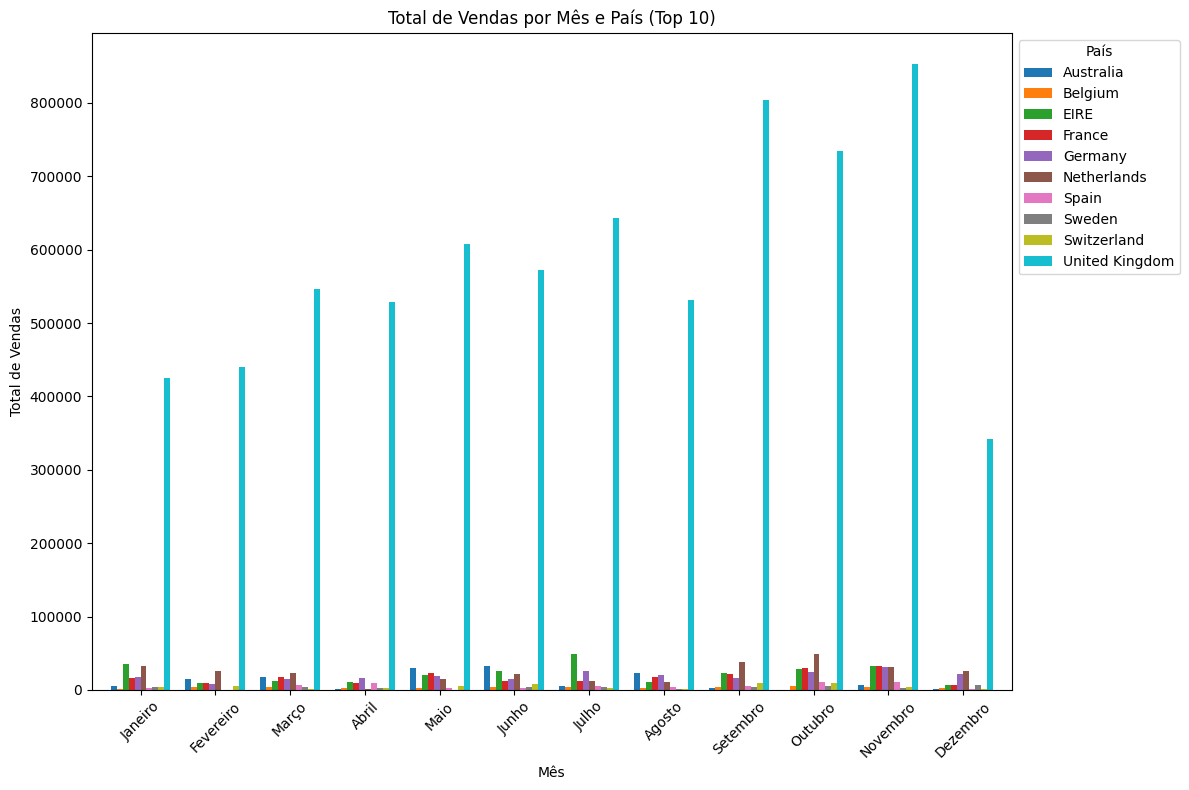

In [118]:
# Agrupando os dados por mês e país e calcular o total de vendas
vendas_mes_pais = df_clean.groupby(['mes', 'Pais'])['Total da compra'].sum().reset_index()

# Selecionar os top 10 países em termos de vendas totais
top_10_paises = vendas_mes_pais.groupby('Pais')['Total da compra'].sum().nlargest(10).index

# Filtrar os dados apenas para os top 10 países
vendas_mes_pais_top_10 = vendas_mes_pais[vendas_mes_pais['Pais'].isin(top_10_paises)]

# Calcular o valor total de vendas por mês e por país, considerando apenas os top 10 países
vendas_mes_pais_top_10_total = vendas_mes_pais_top_10.groupby(['mes', 'Pais'])['Total da compra'].sum().unstack()

# Nomes dos meses
nomes_meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

# Criar o gráfico de barras
vendas_mes_pais_top_10_total.plot(kind='bar', figsize=(12, 8), width=0.8)
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.title('Total de Vendas por Mês e País (Top 10)')
plt.legend(title='País', bbox_to_anchor=(1, 1))
plt.xticks(range(12), nomes_meses, rotation=45)
plt.tight_layout()
plt.show()


RFM -  TRABALHANDO OS AGRUPAMENTOS PARA O RFM


In [119]:
df_clean.head()

,Cod_fatura,Cod_Estoque,Descrição,Quantidade,Data_compra,Preco_unit,CustomerID,Pais,Total da compra,Data,Hora,mes
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-01-12,08:26:00,1
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,08:26:00,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-01-12,08:26:00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,08:26:00,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,08:26:00,1


In [120]:
cliente =  df_clean.groupby('CustomerID')['Cod_fatura','Total da compra'].sum().reset_index()
cliente

<ipython-input-120-ad5d6fb98691>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,CustomerID,Total da compra
0,12347.0,4310.00
1,12348.0,1797.24
2,12349.0,1757.55
3,12350.0,334.40
4,12352.0,2506.04
...,...,...
4332,18280.0,180.60
4333,18281.0,80.82
4334,18282.0,178.05
4335,18283.0,2045.53


In [121]:
fatura_total = df_clean.groupby('CustomerID')['Cod_fatura','Data_compra'].max().reset_index()
fatura_total

<ipython-input-121-48f95628dc86>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,CustomerID,Cod_fatura,Data_compra
0,12347.0,581180,2011-10-31 12:25:00
1,12348.0,568172,2011-09-25 13:13:00
2,12349.0,577609,2011-11-21 09:51:00
3,12350.0,543037,2011-02-02 16:01:00
4,12352.0,574275,2011-09-28 14:58:00
...,...,...,...
4332,18280.0,545712,2011-07-03 09:52:00
4333,18281.0,556464,2011-12-06 10:53:00
4334,18282.0,580173,2011-05-08 13:35:00
4335,18283.0,580872,2011-11-30 12:59:00


In [122]:
#Unindo tabela .
RFM = fatura_total.merge(cliente,on="CustomerID", how = 'inner')

RFM

,CustomerID,Cod_fatura,Data_compra,Total da compra
0,12347.0,581180,2011-10-31 12:25:00,4310.00
1,12348.0,568172,2011-09-25 13:13:00,1797.24
2,12349.0,577609,2011-11-21 09:51:00,1757.55
3,12350.0,543037,2011-02-02 16:01:00,334.40
4,12352.0,574275,2011-09-28 14:58:00,2506.04
...,...,...,...,...
4332,18280.0,545712,2011-07-03 09:52:00,180.60
4333,18281.0,556464,2011-12-06 10:53:00,80.82
4334,18282.0,580173,2011-05-08 13:35:00,178.05
4335,18283.0,580872,2011-11-30 12:59:00,2045.53


In [123]:
#Verificando os dados
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4337 entries, 0 to 4336
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       4337 non-null   float64       
 1   Cod_fatura       4337 non-null   int64         
 2   Data_compra      4337 non-null   datetime64[ns]
 3   Total da compra  4337 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 169.4 KB


In [105]:
data_ultima_compra

Timestamp('2011-12-10 17:19:00')

In [141]:
RFM_copy = RFM.copy()

RFM_copy['Recencia'] = RFM_copy['Data_compra'] - data_ultima_compra
RFM_copy['Qtd_Compras'] = RFM_copy['Cod_fatura'].count()* RFM_copy['Total da compra']
RFM_copy['ticket medio'] = RFM_copy['Cod_fatura'].mean()* RFM_copy['Total da compra']
RFM = RFM_copy

RFM


,CustomerID,Cod_fatura,Data_compra,Total da compra,Recencia,Qtd_Compras,ticket medio
0,12347.0,581180,2011-10-31 12:25:00,4310.00,-41 days +19:06:00,18692470.00,2.448183e+09
1,12348.0,568172,2011-09-25 13:13:00,1797.24,-77 days +19:54:00,7794629.88,1.020875e+09
2,12349.0,577609,2011-11-21 09:51:00,1757.55,-20 days +16:32:00,7622494.35,9.983305e+08
3,12350.0,543037,2011-02-02 16:01:00,334.40,-312 days +22:42:00,1450292.80,1.899472e+08
4,12352.0,574275,2011-09-28 14:58:00,2506.04,-74 days +21:39:00,10868695.48,1.423491e+09
...,...,...,...,...,...,...,...
4332,18280.0,545712,2011-07-03 09:52:00,180.60,-161 days +16:33:00,783262.20,1.025851e+08
4333,18281.0,556464,2011-12-06 10:53:00,80.82,-5 days +17:34:00,350516.34,4.590770e+07
4334,18282.0,580173,2011-05-08 13:35:00,178.05,-217 days +20:16:00,772202.85,1.011367e+08
4335,18283.0,580872,2011-11-30 12:59:00,2045.53,-11 days +19:40:00,8871463.61,1.161910e+09


In [142]:
RFM

,CustomerID,Cod_fatura,Data_compra,Total da compra,Recencia,Qtd_Compras,ticket medio
0,12347.0,581180,2011-10-31 12:25:00,4310.00,-41 days +19:06:00,18692470.00,2.448183e+09
1,12348.0,568172,2011-09-25 13:13:00,1797.24,-77 days +19:54:00,7794629.88,1.020875e+09
2,12349.0,577609,2011-11-21 09:51:00,1757.55,-20 days +16:32:00,7622494.35,9.983305e+08
3,12350.0,543037,2011-02-02 16:01:00,334.40,-312 days +22:42:00,1450292.80,1.899472e+08
4,12352.0,574275,2011-09-28 14:58:00,2506.04,-74 days +21:39:00,10868695.48,1.423491e+09
...,...,...,...,...,...,...,...
4332,18280.0,545712,2011-07-03 09:52:00,180.60,-161 days +16:33:00,783262.20,1.025851e+08
4333,18281.0,556464,2011-12-06 10:53:00,80.82,-5 days +17:34:00,350516.34,4.590770e+07
4334,18282.0,580173,2011-05-08 13:35:00,178.05,-217 days +20:16:00,772202.85,1.011367e+08
4335,18283.0,580872,2011-11-30 12:59:00,2045.53,-11 days +19:40:00,8871463.61,1.161910e+09
